### 고유분해

   - $A = V\Lambda$$V^T$
       - 정방행렬
       - $Au = \lambda{u}$
-----
### 정방행렬 
   
   
  - $A\in{R}^{N\times{M}}$ 
   
   - $\lambda$는 복소수
   - $\lambda$는 $N$개
   - $AV = V\Lambda$
   - $tr A = \Sigma_{i=1}^{N}\lambda_i$
   - $det A = \Pi_{i=1}^{N}\lambda_i$
 
----
### 대칭행렬 

   - $A = A^T$
    - $\lambda$는 실수
    - $V^T = V^{-1}$
    - $A = V\Lambda{V}^T$
    - $A = \Sigma_{i=1}^N\lambda_iV_iV_i^T$
    
----
### 분산행렬 

   - $A = X^TX$
    - 모든 고유값이 0 또는 양수 $\lambda_i \geq 0$

----
### 양의 정부호 (PD)

   - $X$ 가 Full RANK
   - 역행렬 존재
   - 모든 고유값이 양수 $\lambda_i \geq 0$

----
### 특이분해
    
   - $A = U\Sigma$$V^T$
   
     - from numpy.linalg import svd
     - A = np.array([[3,-1],[1,3],[1,1]])
     - U, S, VT = svd(A)
     - svd(A, full_matrices=False) $\rightarrow$ 축소형
     - $Au = \sigma{u}$
     
----

#### RANK-K 근사문제

   - $ arg min \|A-AWW^T\|$

### PCA (주성분 분석)

 - 차원이 높은 데이터
  
  $\rightarrow$ 데이터를 이루는 벡터의 차원이 많다라는 뜻 

----
#### scikit-learn 의 PCA 기능
 
 - 입력인수 : n_components : 정수
 
 - method : fit_transform() : 특징행렬을 낮은 차원의 근사행렬로 변환
           inverse_transform() : 변환된 근사행렬을 원래의 차원으로 복귀
            
 - 속성 : mean_ : 평균벡터
        components_ : 주성분 벡터

In [1]:
# load iris data

from sklearn.datasets import load_iris

In [125]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
iris = load_iris()

In [15]:
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택

In [16]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [17]:
# PCA

from sklearn.decomposition import PCA

In [18]:
pca1 = PCA(n_components=1)

In [19]:
X_low = pca1.fit_transform(X)

In [20]:
# 잠재변수
# 원점을 옯기면서 음수가 나오게 되는 것

X_low

array([[ 0.30270263],
       [-0.1990931 ],
       [-0.18962889],
       [-0.33097106],
       [ 0.30743473],
       [ 0.79976625],
       [-0.11185966],
       [ 0.16136046],
       [-0.61365539],
       [-0.12605597]])

In [21]:
X2 = pca1.inverse_transform(X_low)

In [22]:
# 저차원으로 투영

X2

array([[5.06676112, 3.53108532],
       [4.7240094 , 3.1645881 ],
       [4.73047393, 3.17150049],
       [4.63393012, 3.06826822],
       [5.06999338, 3.53454152],
       [5.40628057, 3.89412635],
       [4.78359423, 3.22830091],
       [4.97021731, 3.42785306],
       [4.44084251, 2.86180369],
       [4.77389743, 3.21793233]])

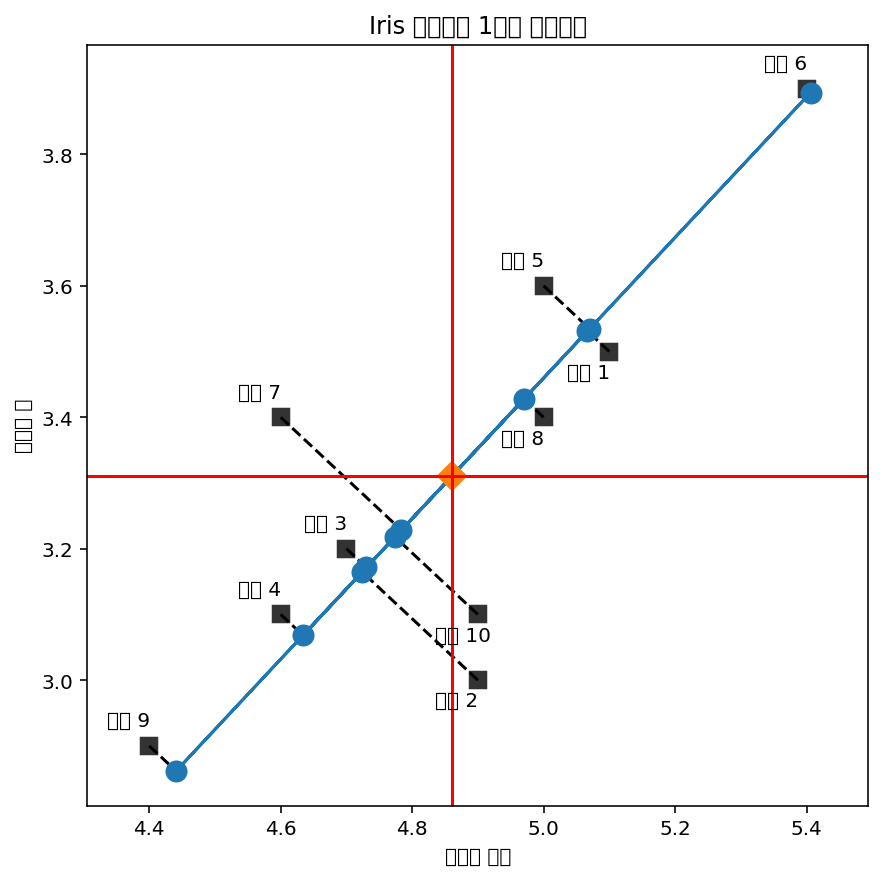

In [23]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()

In [26]:
# 데이터가 있는 중심 위치

pca1.mean_

array([4.86, 3.31])

In [27]:
# 파란색 기저벡터의 방향을 나타내는 단위 벡터

pca1.components_

array([[0.68305029, 0.73037134]])

In [28]:
X0 = X - X.mean(axis=0)
U, S, VT = np.linalg.svd(X0)
VT

array([[-0.68305029, -0.73037134],
       [-0.73037134,  0.68305029]])

In [29]:
VT[:, 0]

array([-0.68305029, -0.73037134])

#### 분산행렬의 고유벡터랑 일치 

In [30]:
XCOV = X0.T @ X0
W, V = np.linalg.eig(XCOV)

In [31]:
W

array([0.17107711, 1.44192289])

In [32]:
V

array([[-0.73037134, -0.68305029],
       [ 0.68305029, -0.73037134]])

In [33]:
V[:, np.argmax(W)]

array([-0.68305029, -0.73037134])

#### 8번째 꽃의 꽃받침 길이와 꽃받침 폭은 다음과 같다.

In [34]:
X[7, :]

array([5. , 3.4])

In [35]:
# 주성분

X_low[7]

array([0.16136046])

In [36]:
X2[7, :]

array([4.97021731, 3.42785306])

----

### 3.5.1 연습문제

 - 붓꽃 데이터 중 앞에서 50개의 데이터(setosa 중)에 대해 다음 문제를 풀어라.
 
1) 꽃 잎의 길이와 꽃잎의 폭을 이용하여 1차원 PCA를 수행하라. 꽃의 크기는 꽃받침 길이와 꽃받침 폭의 어떤 선형조합으로 나타나는가.

In [65]:
N = 10
X = iris.data[:N, :2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [66]:
pca3 = PCA(n_components=1)

In [67]:
X_low = pca3.fit_transform(X)
X_low

array([[ 0.30270263],
       [-0.1990931 ],
       [-0.18962889],
       [-0.33097106],
       [ 0.30743473],
       [ 0.79976625],
       [-0.11185966],
       [ 0.16136046],
       [-0.61365539],
       [-0.12605597]])

In [68]:
X2 = pca3.inverse_transform(X_low)
X2

array([[5.06676112, 3.53108532],
       [4.7240094 , 3.1645881 ],
       [4.73047393, 3.17150049],
       [4.63393012, 3.06826822],
       [5.06999338, 3.53454152],
       [5.40628057, 3.89412635],
       [4.78359423, 3.22830091],
       [4.97021731, 3.42785306],
       [4.44084251, 2.86180369],
       [4.77389743, 3.21793233]])

2) 꽃 받침 길이와 폭, 꽃잎 길이와 폭, 이 4가지 변수를 모두 사용하여 1차원 PCA를 수행하라. 꽃의 크기는 관측 데이터의 어떤 선형조합으로 나타나는가.

In [40]:
N = 10
X = iris.data[:N, :]

In [41]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [42]:
pca2 = PCA(n_components=1)

In [43]:
X_low = pca2.fit_transform(X)

In [44]:
X_low

array([[ 0.28600351],
       [-0.20593593],
       [-0.21267237],
       [-0.31826466],
       [ 0.29085585],
       [ 0.84524522],
       [-0.10829984],
       [ 0.16397009],
       [-0.61165489],
       [-0.12924697]])

In [45]:
X2 = pca2.inverse_transform(X_low)
X2

array([[5.0510821 , 3.51495998, 1.4970222 , 0.25264906],
       [4.72241193, 3.16241921, 1.41614181, 0.19649115],
       [4.71791125, 3.15759165, 1.41503426, 0.19572214],
       [4.64736387, 3.08192057, 1.3976737 , 0.18366814],
       [5.054324  , 3.51843733, 1.49781998, 0.25320298],
       [5.42471764, 3.91573186, 1.58896784, 0.31648993],
       [4.78764369, 3.2323886 , 1.43219429, 0.20763691],
       [4.96955022, 3.42750662, 1.47695853, 0.23871819],
       [4.45134663, 2.87166702, 1.34943704, 0.15017584],
       [4.77364867, 3.21737716, 1.42875034, 0.20524567]])

#### PCA를 왜 배워야하나?

 - 데이터의 양이 종류가 많은 것보다 좋다. 
 - 선형 종속에 가까워지면 역행렬이 거의 나오지 않는다. 
 
 $\rightarrow$ 데이터를 버리는 작업을 해야한다. (특징선택:feature selection)
 
  * 이럴 때 PCA를 활용!! 
    $\rightarrow$ 데이터를 압축해서 저차원의 데이터로 만들어 줌.
    
-----

### 이미지 PCA

In [46]:
from sklearn.datasets import fetch_olivetti_faces

In [73]:
faces_all = fetch_olivetti_faces()
K = 15  # 20번 인물의 사진만 선택

In [74]:
faces = faces_all.images[faces_all.target == K]

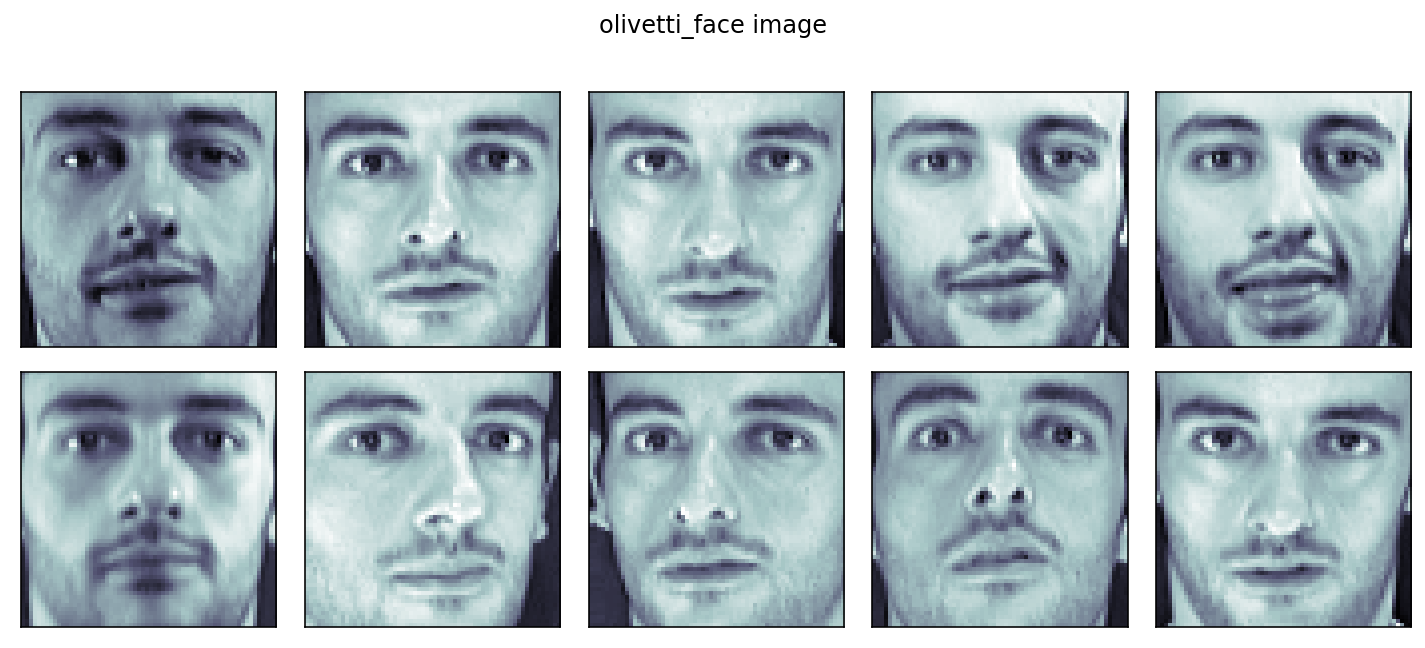

In [75]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("olivetti_face image")
plt.tight_layout()
plt.show()

In [76]:
faces.shape

(10, 64, 64)

In [77]:
64*64

4096

In [78]:
pca4 = PCA(n_components=2)
X3 = faces_all.data[faces_all.target == K]
W3 = pca4.fit_transform(X3)
X32 = pca4.inverse_transform(W3)

In [82]:
X32

array([[0.5157843 , 0.60134435, 0.6456266 , ..., 0.12479337, 0.19771191,
        0.19845061],
       [0.4685781 , 0.5048286 , 0.52106005, ..., 0.4211737 , 0.28197354,
        0.27164716],
       [0.46160844, 0.49110532, 0.5040933 , ..., 0.45480734, 0.29185975,
        0.28029943],
       ...,
       [0.46257532, 0.49394417, 0.5089767 , ..., 0.43216398, 0.2859526 ,
        0.27527326],
       [0.4657001 , 0.50426555, 0.527861  , ..., 0.33693826, 0.26129964,
        0.25433782],
       [0.46114448, 0.49068093, 0.5042871 , ..., 0.44764203, 0.2901452 ,
        0.27887404]], dtype=float32)

In [102]:
# eigenface

faces_all = fetch_olivetti_faces()
K = 8

In [103]:
faces = faces_all.images[faces_all.target == K]

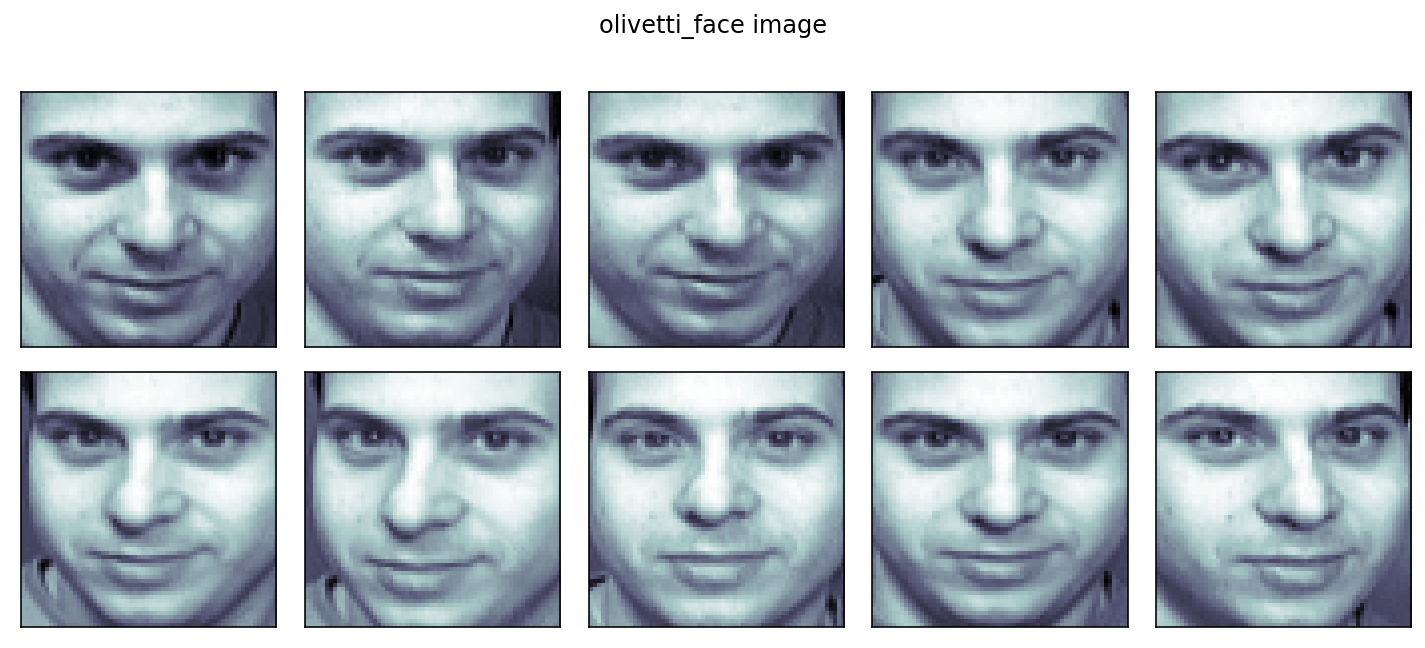

In [104]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("olivetti_face image")
plt.tight_layout()
plt.show()

---